## Lab9

### zad 1

In [4]:
using Polynomials, LinearAlgebra, Plots, DataFrames, CSV

A = rand(1000, 1000)
x = rand(1000)
b = A*x
df = DataFrame(Method=String[], Difference=Float64[], Time=Float64[])

time_test = @elapsed A*b

invMethod = x - inv(A)*b
res1 = sqrt(dot(invMethod,invMethod))
time1 = @elapsed inv(A)*b
push!(df,("inv()",res1,time1))

normMethod = x - A\b
res2 = sqrt(dot(normMethod,normMethod))
time2 = @elapsed A\b
push!(df,("/",res2,time2))

Af = factorize(A)
factMethod = x - Af\b
res3 = sqrt(dot(factMethod,factMethod))
time3 = @elapsed factorize(A)\b
push!(df,("factorize()",res3,time3))

df

Row,Method,Difference,Time
,String,Float64,Float64
1,inv(),4.31134e-11,0.0588998
2,/,3.23476e-11,0.014385
3,factorize(),3.23476e-11,0.0142965


### zad 2

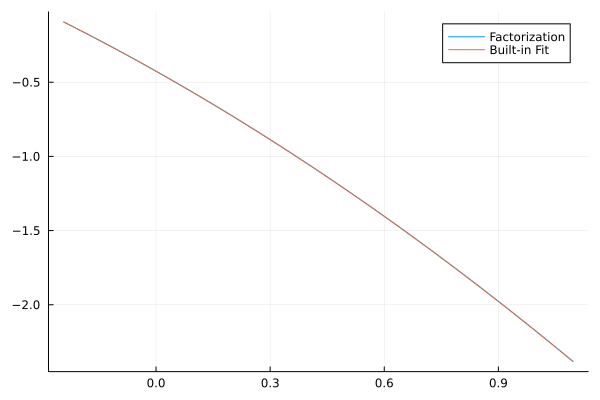

In [5]:
df = CSV.read("ecg_data.csv", DataFrame)

x = df.signalN
y = df.signalV

design_matrix = hcat(x.^2, x, ones(length(x)))
factorization = factorize(design_matrix)

# Solve the linear system
coefficients = factorization \ y

# Construct the polynomial
polynomial_model = Polynomial(reverse(coefficients))

# Fit a polynomial using the built-in function
built_in_fit = fit(x, y, 2)

xs = range(minimum(x), stop=maximum(x), length=100)
plot(xs, polynomial_model.(xs), label="Factorization")
plot!(xs, built_in_fit.(xs), label="Built-in Fit")

### zad 3

##### Uzycie faktoryzacji QR do znajdowania wartości własnych


Algorytm QR polega na wyliczaniu wartości własnych oraz wektorów własnych macierzy. Składa się z następujących kroków:

1. Wykonanie faktoryzacji QR na macierzy.
2. Zapisanie macierzy jako iloczynu macierzy ortogonalnej oraz macierzy trójkątnej własnej.
3. Mnożenie czynników w odwrotnej kolejności.

W algorytmie korzystamy z następującej zależności:

A<sub>k+1</sub> = R<sub>k</sub>Q<sub>k</sub> = Q<sup>-1</sup><sub>k</sub>Q<sub>k</sub>R<sub>k</sub>Q<sub>k</sub> = 
Q<sup>-1</sup><sub>k</sub>A<sub>k</sub>Q<sub>k</sub> = Q<sup>T</sup><sub>k</sub>A<sub>k</sub>Q<sub>k</sub>

Algorytm, który zaimplementowano w funkcji `myEigenValues`, nazywany jest algorytmem iteracyjnej faktoryzacji QR. Polega on na kolejnym faktoryzowaniu macierzy A na macierze ortogonalną Q i trójkątną górną R, a następnie mnożeniu ich transponowanej i oryginalnej macierzy A, aby otrzymać kolejne przybliżenia wartości własnych. Proces ten powtarza się przez określoną liczbę iteracji, aż uzyskane przybliżenie wartości własnych zbiegnie do wartości własnych macierzy A.

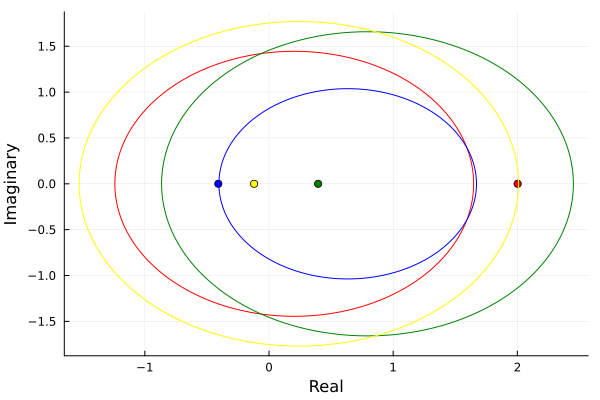

In [6]:
function myEigenValues(A, howPrecise)
    for i in 1:howPrecise
        # Faktoryzacja QR
        Af = qr(A)
        Q = Af.Q
        
        A = Q' * A * Q
    end
    
    # Zwrócenie wartości własnych
    values = [A[i, i] for i in 1:size(A, 1)]
    return values
end


function get_disks(A)
    disks = []
    for i in 1:size(A,1)
        res = 0
        for j in 1:size(A,2)
            if j != i
               res += abs(A[i,j]) 
            end
        end
        push!(disks, (A[i,i], res)) 
    end
    disks
end

function draw_disk(h, k, r)
    theta = 0:0.01:2*pi
    h .+ r*sin.(theta), k .+ r*cos.(theta)
end

function make_complex(ev)
    [(e, 0) for e in ev]
end

A = rand(4, 4)
ev = myEigenValues(A, 10)
ev_plot = make_complex(ev)
disks = get_disks(A)
colors = [:red, :blue, :green, :yellow]

res = scatter(
    xlabel = "Real", 
    ylabel = "Imaginary",
)

for i in 1:size(disks, 1)
    d = disks[i]
    scatter!(res, ev_plot[i],
        color = colors[i],
        fillalpha = 0.25,
        label = ""
    )
    plot!(res, draw_disk(d[1], 0, d[2]), 
        color = colors[i], 
        fillalpha = 0.25, 
        label = ""
    )
end

res